In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [3]:
load_dotenv()

True

In [7]:
#Set Current Amount of Crypto Assets
my_btc=1.2
my_eth=5.3

In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [18]:
# Fetch current BTC price

BTC = requests.get(btc_url).json()
BTC_price=BTC["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price

ETH = requests.get(eth_url).json() 
ETH_price=ETH["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto

my_btc_value = my_btc*BTC_price
my_eth_value = my_eth*ETH_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $50553.60
The current value of your 5.3 ETH is $16671.89


In [19]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [20]:
# Set Alpaca API key and secret (I know...the bad way)
alpaca_api_key = "PKU3VR3LMBHO2Y523CHK"
alpaca_secret_key = "TXOg9a74WEBkvP8gPox3kvByDW4a6Iuareh8t7B8"
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [21]:
# Format current date as ISO format
date = pd.Timestamp("2020-01-03", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
closing_prices= alpaca.get_barset(tickers, timeframe, start=date, limit=1000).df

# Preview DataFrame
closing_prices.head(10)

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2020-01-03 00:00:00-05:00  112.89  113.05  112.7814  113.02  3465113   
2020-01-06 00:00:00-05:00  113.13  113.13  112.8400  112.92  4420760   
2020-01-07 00:00:00-05:00  112.92  112.92  112.7800  112.80  2678852   
2020-01-08 00:00:00-05:00  112.85  112.94  112.5450  112.66  3161792   
2020-01-09 00:00:00-05:00  112.49  112.79  112.4600  112.79  4255663   
2020-01-10 00:00:00-05:00  112.90  112.99  112.8200  112.99  3618649   
2020-01-13 00:00:00-05:00  112.89  112.94  112.8250  112.89  3527509   
2020-01-14 00:00:00-05:00  112.97  113.02  112.9300  113.00  2651024   
2020-01-15 00:00:00-05:00  113.18  113.19  113.0700  113.19  2431966   
2020-01-16 00:00:00-05:00  113.16  113.21  113.0500  113.15  2559756   

                                SPY                                     
                               open    high      low   close    volume  
time                                                                    
2020-01-03 00:00:00-05:00  321.1600  323.64  321.100  322.44  55090099  
2020-01-06 00:00:00-05:00  320.4800  323.73  320.360  323.67  41271531  
2020-01-07 00:00:00-05:00  323.0200  323.54  322.240  322.73  33333873  
2020-01-08 00:00:00-05:00  322.9400  325.78  322.690  324.42  53033838  
2020-01-09 00:00:00-05:00  326.1600  326.73  325.520  326.62  40652148  
2020-01-10 00:00:00-05:00  327.2899  327.46  325.200  325.70  42585254  
2020-01-13 00:00:00-05:00  326.3900  327.96  325.920  327.94  34646079  
2020-01-14 00:00:00-05:00  327.4700  328.62  326.844  327.43  51206473  
2020-01-15 00:00:00-05:00  327.3500  329.02  327.260  328.17  55776569  
2020-01-16 00:00:00-05:00  329.7000  330.91  329.450  330.91  39708125

In [27]:
# Pick AGG and SPY close prices
agg_close_price = float(closing_prices["AGG"]["close"][0])
spy_close_price = float(closing_prices["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.02
Current SPY closing price: $322.44


In [29]:
# Compute the current value of shares
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16122.00
The current value of your 200 AGG shares is $22604.00


In [36]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
df_savings = [my_btc_value+my_eth_value, my_agg_value+my_spy_value]

# Create savings DataFrame
savings = pd.DataFrame(df_savings,columns=["Amount"],index=["crypto", "shares"])

# Display savings DataFrame
display(savings)

,Amount
crypto,67225.492
shares,38726.000


<AxesSubplot:title={'center':'My Saving'}, ylabel='Amount'>

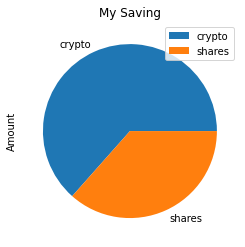

In [38]:
# Plot savings pie chart
savings.plot.pie(y="Amount", title="My Saving")

In [41]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund!")

Congratulations! You have enough money in your emergency fund!


In [ ]:
#PART 2 - RETIREMENT PLANNING

In [42]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [45]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Display sample data
df_stock_data.tail(10)

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2021-04-19 00:00:00-04:00  114.00  114.5000  114.0000  114.44  4820664.0   
2021-04-20 00:00:00-04:00  114.42  114.6700  114.3900  114.62  3674209.0   
2021-04-21 00:00:00-04:00  114.60  114.7400  114.5300  114.74  5250384.0   
2021-04-22 00:00:00-04:00  114.74  114.8000  114.5900  114.77  3518947.0   
2021-04-23 00:00:00-04:00  114.81  115.0860  114.6415  114.75  3506457.0   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.65  2867784.0   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.37  3421667.0   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.2000  114.44  6185936.0   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.0900  114.37  5796983.0   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.3300  114.50  5160765.0   

                              SPY                                          
                             open      high       low   close      volume  
time                                                                       
2021-04-19 00:00:00-04:00  416.26  416.7400  413.7900  415.24  66226327.0  
2021-04-20 00:00:00-04:00  413.91  415.0859  410.5900  412.22  69715050.0  
2021-04-21 00:00:00-04:00  411.51  416.2900  411.3600  416.08  54772634.0  
2021-04-22 00:00:00-04:00  415.88  416.7800  411.1300  412.30  90086341.0  
2021-04-23 00:00:00-04:00  412.87  418.2500  412.7900  416.72  62184753.0  
2021-04-26 00:00:00-04:00  417.44  418.2200  416.8111  417.64  44689009.0  
2021-04-27 00:00:00-04:00  417.91  418.1400  416.3000  417.48  45962655.0  
2021-04-28 00:00:00-04:00  417.81  419.0100  416.9000  417.35  45533863.0  
2021-04-29 00:00:00-04:00  420.33  420.7200  416.4400  419.98  70595229.0  
2021-04-30 00:00:00-04:00  417.63  418.5400  416.3400  417.30  73129109.0

In [56]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
Monte_30yr = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation =500, num_trading_days = 252 * 30,)


In [57]:
Monte_30yr.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [58]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
Monte_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Chris\desktop\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002985,1.008615,1.000671,0.986424,0.990411,0.997069,0.989258,1.009264,1.015618,0.984894,...,1.000196,0.985067,0.994382,0.992943,1.000673,1.006457,1.003683,0.996826,1.004442,1.018139
2,1.002468,1.006721,1.000072,0.990763,1.006044,0.999138,0.986955,1.003097,1.013823,0.979957,...,1.003472,0.976385,0.997912,0.992384,1.005914,1.006089,0.999625,1.003649,1.011080,1.016069
3,1.001451,1.010087,0.998748,0.984201,1.007185,0.992055,0.979003,1.000256,1.003567,0.979237,...,1.005867,0.973168,0.993864,0.994608,1.011432,1.005844,1.015744,0.998211,1.014011,1.019944
4,1.001978,1.019141,0.994507,0.989203,1.007910,0.977010,0.974486,1.009624,1.015893,0.980501,...,0.996617,0.970555,1.006748,0.986051,1.019267,0.997552,1.022763,0.997303,1.001166,1.009035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.005696,14.132608,3.654530,22.682518,38.109975,11.757404,12.962183,21.940758,16.522595,8.526106,...,18.946027,16.594027,41.580088,13.531889,11.533070,86.564010,24.244275,14.708674,32.450121,47.511052
7557,7.992316,14.238923,3.618217,22.834855,37.907162,11.708182,12.835274,21.871103,16.594376,8.411621,...,19.090795,16.735041,41.596002,13.618426,11.446459,86.474580,24.213040,14.717707,32.402183,47.616443
7558,7.964133,14.396979,3.549335,22.818244,37.714673,11.831896,12.640245,22.117597,16.691469,8.338959,...,19.275375,16.892172,41.261541,13.731587,11.594746,85.541247,24.128362,14.711674,32.035856,47.660354
7559,7.892364,14.266830,3.525302,22.644273,37.595615,11.963300,12.667271,22.231664,16.623136,8.279256,...,19.456475,16.806433,41.591445,13.785867,11.685944,85.982827,24.603609,14.616210,31.457101,47.820722


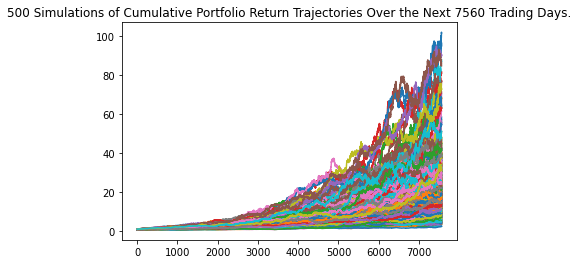

In [59]:
# Plot simulation outcomes
line_graph = Monte_30yr.plot_simulation()

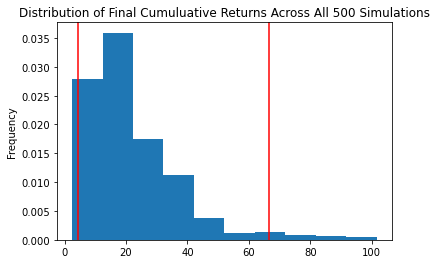

In [60]:
# Plot probability distribution and confidence intervals
Prob_Dist = Monte_30yr.plot_distribution()

In [ ]:
#Retirement Analysis

In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
Stat_Monte_Carlo = Monte_30yr.summarize_cumulative_return()

# Print summary statistics
print(Stat_Monte_Carlo)

count           500.000000
mean             22.044775
std              15.313662
min               2.457815
25%              11.822761
50%              18.627828
75%              27.826551
max             101.572731
95% CI Lower      4.396847
95% CI Upper     66.541632
Name: 7560, dtype: float64


In [67]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
confidence_lower = round(Stat_Monte_Carlo[8] * initial_investment,2)
confidence_upper = round(Stat_Monte_Carlo[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${confidence_lower} and ${confidence_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $87936.94 and $1330832.63


In [68]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
confidence_lower = round(Stat_Monte_Carlo[8] * initial_investment,2)
confidence_upper = round(Stat_Monte_Carlo[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${confidence_lower} and ${confidence_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $131905.4 and $1996248.95
